<a href="https://colab.research.google.com/github/cminy/FC2022code/blob/main/APG_python_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyreadstat

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyreadstat

In [ ]:
raw_welfare = pd.read_spss('/content/drive/MyDrive/001 Work/001_02 실습조교_패스트캠퍼스B2B/220426_아모레퍼시픽/아모레퍼시픽_Python 데이터 분석 과정_강의자료(김영우 강사)/01_data/Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()
welfare.head()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [ ]:
welfare = welfare.rename(columns = {
  'h14_g3' : 'sex',
  'h14_g4' : 'birth',
  'p1402_8aq1' : 'income'
})
welfare.describe()
welfare.info()
welfare.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


(14418, 830)

In [ ]:
# Q1. 성별에 따른 월급 차이

In [ ]:
## 변수 이상치 검토
welfare.value_counts('sex'), welfare.sex.isna().sum()

(sex
 2.0    7913
 1.0    6505
 dtype: int64, 0)

In [ ]:
# 이름 부여
welfare['sex'] = np.where(welfare['sex']==1.0, 'male', 'female')
welfare.sex.value_counts()

female    7913
male      6505
Name: sex, dtype: int64

In [ ]:
## 변수 이상치 검토
welfare.value_counts('income'), welfare.income.isna().sum()

(income
 27.0      281
 200.0     145
 150.0      86
 250.0      84
 180.0      73
          ... 
 589.0       1
 598.0       1
 13.0        1
 601.0       1
 1892.0      1
 Length: 709, dtype: int64, 9884)

In [ ]:
welfare.income.describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [ ]:
## 성별에 따른 월급표 만들어보기
sex_income = welfare.dropna(subset = ['income'])\
  .groupby('sex', as_index = False)['income'].mean()
sex_income

,sex,income
0,female,186.293096
1,male,349.037571


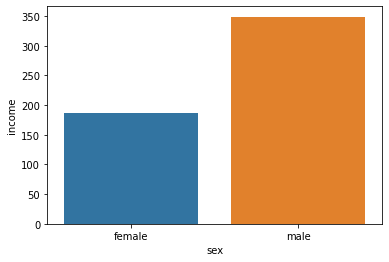

In [ ]:
sns.barplot(data = sex_income, x = 'sex', y = 'income');

In [ ]:
# Q2. 나이와 월급
## 변수 이상치 검토
welfare.value_counts('birth'), welfare.birth.isna().sum()

(birth
 1942.0    317
 1939.0    258
 1940.0    255
 1947.0    246
 1943.0    233
          ... 
 1924.0      4
 1920.0      2
 1919.0      2
 1917.0      1
 1907.0      1
 Length: 102, dtype: int64, 0)

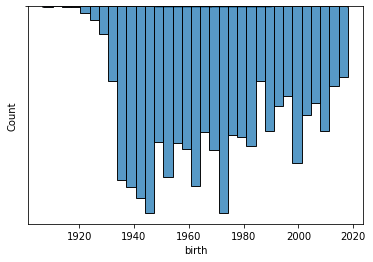

In [ ]:
sns.boxplot(data = welfare, x = 'birth');
sns.histplot(data = welfare, x = 'birth');

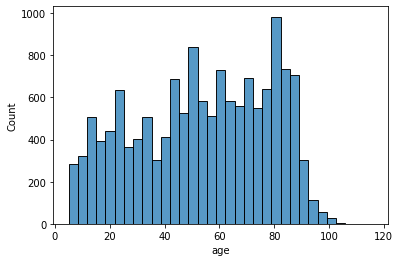

In [ ]:
welfare['age'] = (2022 - welfare['birth'] +1)
welfare['age']
sns.histplot(data = welfare, x = 'age');

In [ ]:
## 성별에 따른 월급표 만들어보기
age_income = welfare.dropna(subset = ['income'])\
  .groupby('age', as_index = False)['income'].mean().round(2)
age_income

,age,income
0,22.0,162.00
1,23.0,121.33
2,24.0,136.40
3,25.0,123.67
4,26.0,179.68
...,...,...
69,91.0,27.00
70,92.0,27.00
71,93.0,27.00
72,94.0,20.00


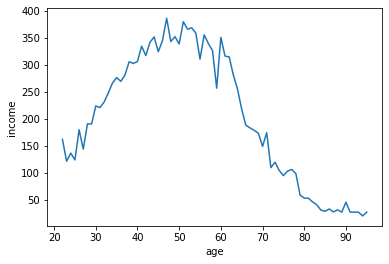

In [ ]:
sns.lineplot(data = age_income, x = 'age', y = 'income')

In [ ]:
# Q3. 연령대
welfare['ages'] = np.where(welfare.age < 30, "young",
                           np.where(welfare.age >=60, "old", "middle"))
welfare.ages.value_counts()

old       6514
middle    4801
young     3103
Name: ages, dtype: int64

In [ ]:
ages_income = welfare.dropna(subset = ['income']).groupby('ages', as_index=False)\
.agg(ages_mean = ('income','mean'))
ages_income

,ages,ages_mean
0,middle,320.773481
1,old,177.182085
2,young,169.902174


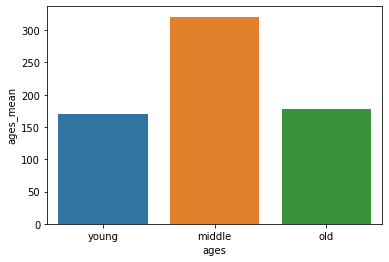

In [ ]:
sns.barplot(data=ages_income, x='ages', y='ages_mean', order=['young','middle','old']);

In [ ]:
# Q4. 연령대 및 성별 월급 차이
welfare[['ages','sex','income']].head()

,ages,sex,income
0,old,female,NaN
1,old,male,NaN
2,old,male,107.0
3,old,male,192.0
4,old,female,NaN


In [ ]:
as_income = welfare.dropna(subset=['income'])\
.groupby(['ages','sex'], as_index = False)['income'].mean()
as_income

,ages,sex,income
0,middle,female,234.216730
1,middle,male,392.767236
2,old,female,105.104054
3,old,male,262.934084
4,young,female,170.821053
5,young,male,167.872093


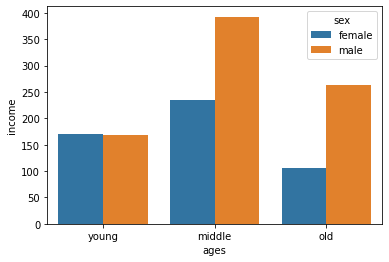

In [ ]:
sns.barplot(data = as_income, x='ages', y='income', hue='sex',order=['young','middle','old'])